In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="whitegrid")

In [3]:
data = pd.read_csv('loan_data.csv')


data.head()

,default,student,balance,income
0,No,No,729.53,44361.63
1,No,Yes,817.18,12106.13
2,No,No,1073.55,31767.14
3,No,No,529.25,35704.49
4,No,No,785.66,38463.50


In [4]:
X = data.drop('default', axis=1)
y = data['default']


categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-13-dbbb07010ee9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='balance', y='default', inner='box', palette='Dark2')


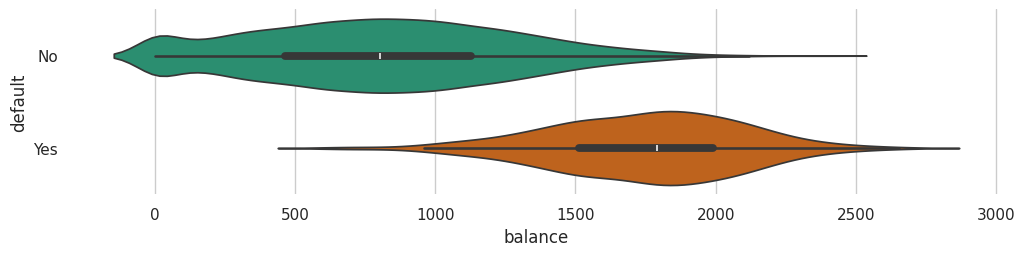

In [13]:
# @title default vs balance

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['default'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='balance', y='default', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

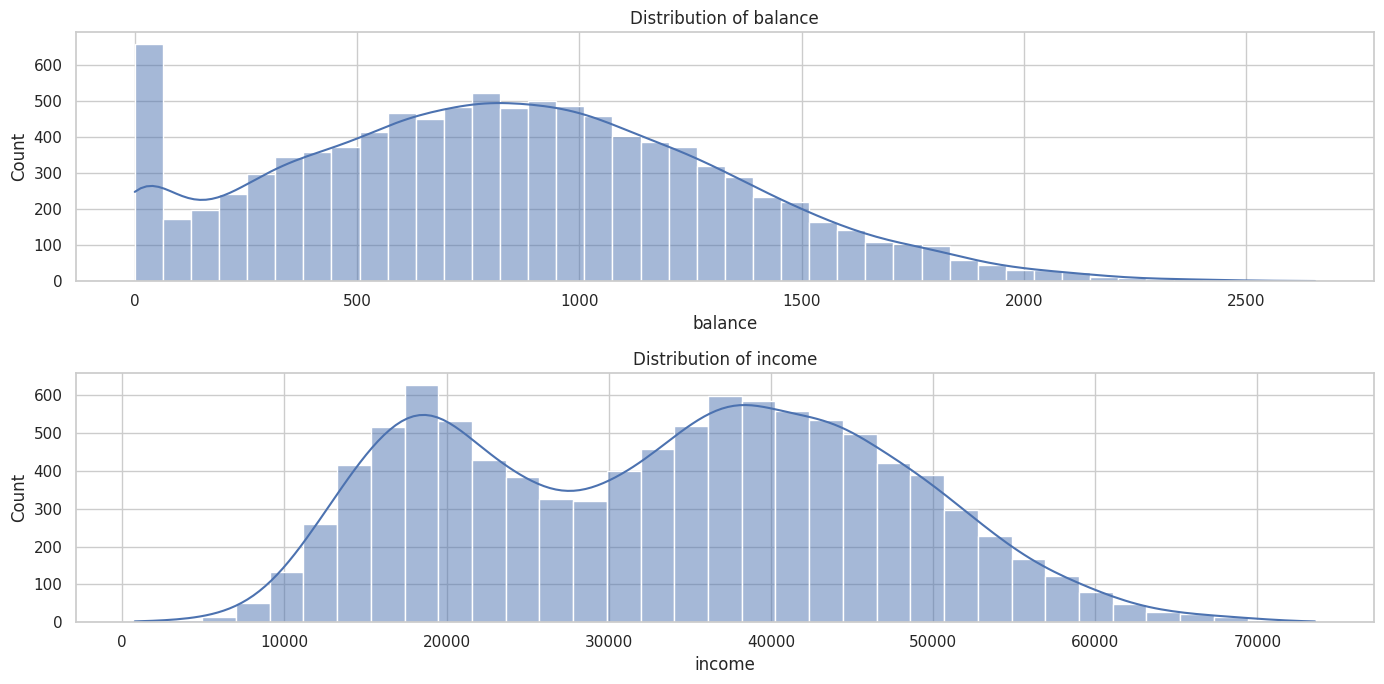

In [8]:
numerical_features = data.select_dtypes(include=['number']).columns

plt.figure(figsize=(14, 7))
for i, col in enumerate(numerical_features):
    plt.subplot(2, len(numerical_features)//2, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

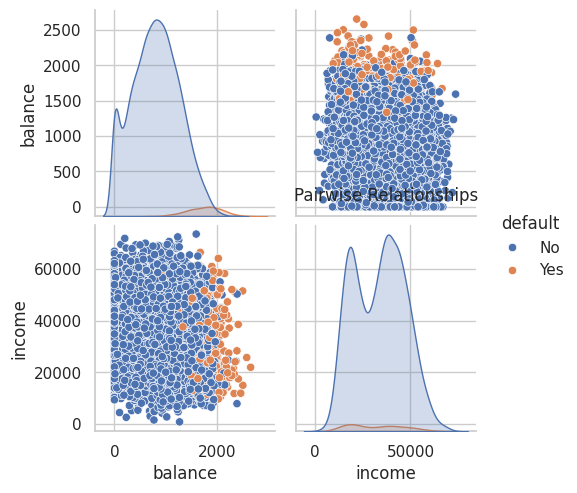

In [10]:
sns.pairplot(data, hue='default', vars=numerical_features[:4])
plt.title('Pairwise Relationships')
plt.show()

In [5]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])


model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['balance', 'income'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['student'], dtype='object'))])),
                ('classifier', LogisticRegression(solver='liblinear'))])

In [6]:
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.97
Confusion Matrix:
[[1923    8]
 [  51   18]]
Classification Report:
              precision    recall  f1-score   support

          No       0.97      1.00      0.98      1931
         Yes       0.69      0.26      0.38        69

    accuracy                           0.97      2000
   macro avg       0.83      0.63      0.68      2000
weighted avg       0.96      0.97      0.96      2000

